# Question Q16

*Question*: Which of the following ML model aspects are monitored for the deployed ML-enabled system projects you have worked on?

*Answer Type*: Multiple Option and Free Field

*Options*: [Model inputs and outputs. Monitors the input being fed into the models and what predictions the models are making from these inputs; Model interpretability outputs. Monitors metrics such as model coefficients that allow further investigation to understand how the models are making predictions; Model outputs and decisions. Monitors the predictions the models is making given the production input data, and also which decisions are being made with those predictions; Model fairness. Monitors input data and output predictions against known features that could produce bias, such as race, gender, age, and income groups; Other please specify]

### Necessary Libraries

In [1]:
import pandas as pd
from utils.basic import rename_values, format_wordcloud_text
from utils.dataframe import DataframeUtils
from utils.plot import PlotUtils
from utils.bootstrapping import BootstrappingUtils

### Dataframe Init

In [2]:
dataframe_obj = DataframeUtils('./data/main_data.csv', ';', './data/unused_columns.txt', './data/formatted_columns.txt')
# the index is not important, but when we internally format df we need to reset index
dataframe_obj.df = dataframe_obj.df.reset_index(drop=True)

In [3]:
# For PROFES, we discarded suspended submissions (e.g., remove those who didn't complete the survey).
dataframe_obj.df.drop(dataframe_obj.df[dataframe_obj.df['Status'] == 'Suspended (22)'].index, inplace = True)

In [4]:
# question options
model_aspects = {
    'Q16_Model_Monitor_Aspects_Input_And_Output': 'Input or Output',
    'Q16_Model_Monitor_Aspects_Interpretability_Output': 'Interpretability Output',
    'Q16_Model_Monitor_Aspects_Output_And_Decisions': 'Output and Decisions',
    'Q16_Model_Monitor_Aspects_Fairness': 'Fairness',
    'Q16_Model_Monitor_Aspects_Others': 'Others',
}

### Basic Analysis

In [5]:
dataframe_obj.df[['Q16_Model_Monitor_Aspects_Input_And_Output', 
                  'Q16_Model_Monitor_Aspects_Interpretability_Output',
                  'Q16_Model_Monitor_Aspects_Output_And_Decisions',
                  'Q16_Model_Monitor_Aspects_Fairness', 'Q16_Model_Monitor_Aspects_Others', 
                  'Q16_Model_Monitor_Aspects_Others_Free']].head()

,Q16_Model_Monitor_Aspects_Input_And_Output,Q16_Model_Monitor_Aspects_Interpretability_Output,Q16_Model_Monitor_Aspects_Output_And_Decisions,Q16_Model_Monitor_Aspects_Fairness,Q16_Model_Monitor_Aspects_Others,Q16_Model_Monitor_Aspects_Others_Free
0,not quoted,not quoted,not quoted,not quoted,not quoted,-99
1,not quoted,not quoted,quoted,not quoted,not quoted,-99
2,quoted,not quoted,quoted,not quoted,not quoted,-99
3,not quoted,quoted,quoted,not quoted,not quoted,-99
4,not quoted,quoted,quoted,not quoted,not quoted,-99


In [6]:
indexes = []
values = []
chart_positions = []
for aspect in model_aspects:
    indexes.append(model_aspects[aspect])
    values.append(dataframe_obj.df[aspect].value_counts()['quoted'])
    chart_positions.append(1 if 'Others' not in aspect else 0)

In [7]:
# compute total of unique answers in this question
total = 0
for idx, row in dataframe_obj.df.iterrows():
        
    if row['Q16_Model_Monitor_Aspects_Input_And_Output'] == 'quoted' or row['Q16_Model_Monitor_Aspects_Interpretability_Output'] == 'quoted' or row['Q16_Model_Monitor_Aspects_Output_And_Decisions'] == 'quoted' or row['Q16_Model_Monitor_Aspects_Fairness'] == 'quoted' or row['Q16_Model_Monitor_Aspects_Others'] == 'quoted':
        total += 1

total_answers = 'N = ' + str(total)
total_answers_int = total

In [8]:
# plot object
q16_plot = PlotUtils(pd.DataFrame(
    data={'Model Aspects': indexes, 'Answers': values, 'Chart Position': chart_positions}
).sort_values(by=['Chart Position', 'Answers'], ascending=False))

C:\Users\Antonio Pedro Alves\.virtualenvs\pfp-antonio-pedro-aVZriNVE\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


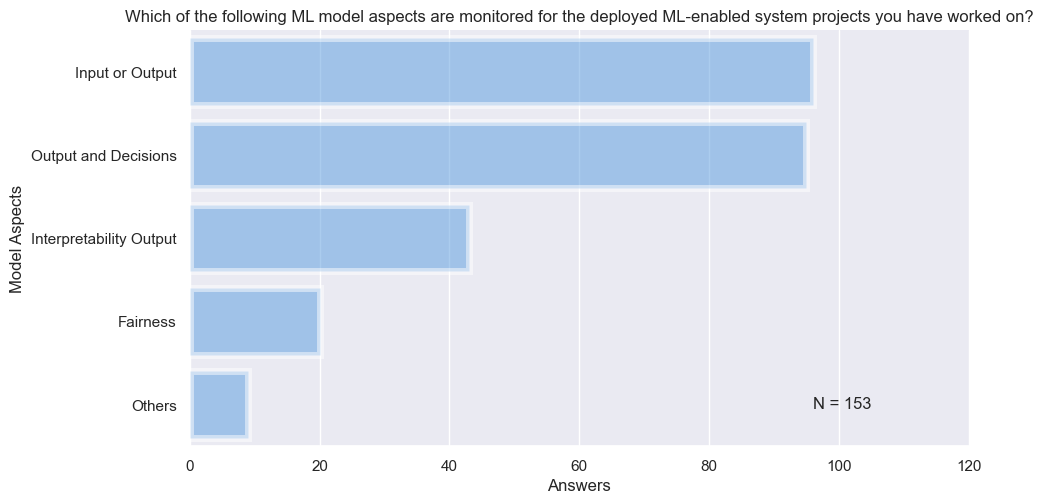

In [9]:
q16_plot.single_barplot(x_axis="Answers", y_axis="Model Aspects",
                       title="Which of the following ML model aspects are monitored for the deployed ML-enabled system projects you have worked on?",
                       x_label="Answers", y_label="Model Aspects", x_label_rotation=0, color="#429bf5", total_answers=total_answers)

#### WordCloud

In [10]:
# remove unnecessary values
aspects_free = list(filter(lambda a: str(a) != '-99', 
                           list(dataframe_obj.df['Q16_Model_Monitor_Aspects_Others_Free'])))
aspects_free = list(filter(lambda a: str(a) != '-66', aspects_free))
aspects_free = list(filter(lambda a: str(a) != 'nan', aspects_free))

In [11]:
aspects_words = format_wordcloud_text(texts=aspects_free, use_sep=False)

In [12]:
# plot object
q16_wc_plot = PlotUtils(pd.DataFrame(
    data={'Word': list(aspects_words.keys()), 'Weight': list(aspects_words.values())}
))

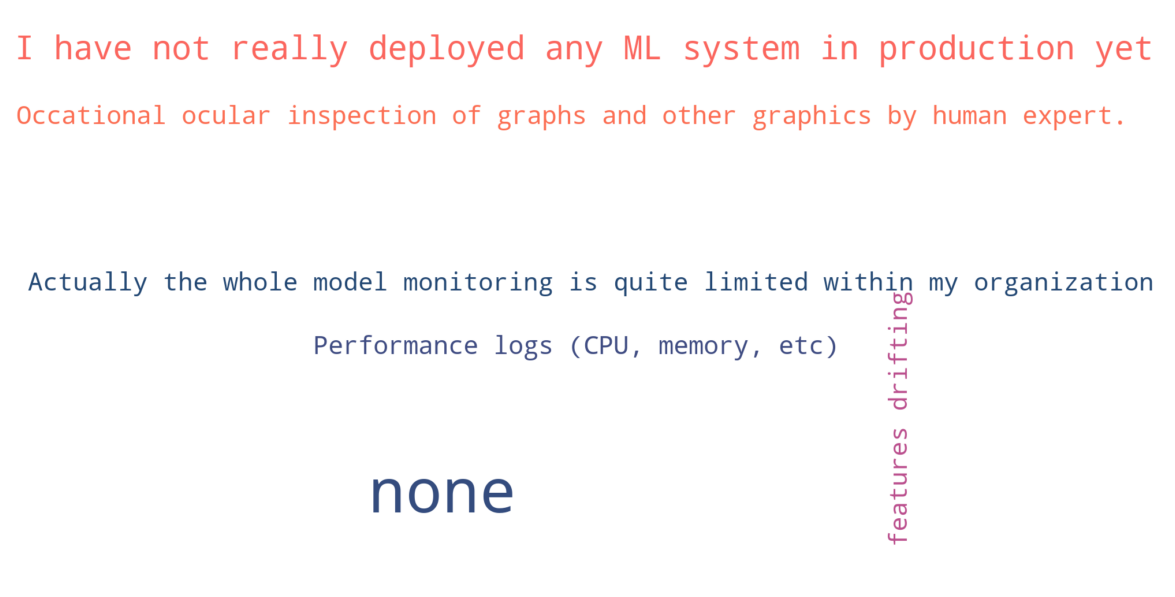

In [13]:
q16_wc_plot.wordcloud("Word", 'Weight')

### Bootstrapping Analysis

In [14]:
prefix = "Q16_Model_Monitor_Aspects_"

In [15]:
# the possible answers are the ones in columns
valid_options_list = [aspect_column.split(prefix)[1] for aspect_column in model_aspects]

In [16]:
valid_options_list

['Input_And_Output',
 'Interpretability_Output',
 'Output_And_Decisions',
 'Fairness',
 'Others']

In [17]:
# answers could be composed by more than one option, so we will have an array of selected options
valid_answers_list = []
for idx, row in dataframe_obj.df.iterrows():
    answer = []
    for option in valid_options_list:
        if row[prefix + option] == 'quoted':
            answer.append(option)
    
    # if answer is empty, we assume that 'None' was assigned - in terms of meaning 'Other context not listed'
#     if not answer:
#         answer = ['Others']
    valid_answers_list.append(answer)

In [18]:
replacements = total_answers_int # equals n - total valid answers
population_sample_size = 1000 

bootstrapping_obj = BootstrappingUtils(valid_answers_list, valid_options_list, replacements, population_sample_size, 95)

In [19]:
bootstrapped_dict_data = bootstrapping_obj.bootstrapping(question_type="multiple")

In [20]:
# get a pair of values between dict key and all the list values inside that key 
# key: [val_1, val_2] ---> [(key, val_1), (key, val_2)...]
indexes = []
values = []
chart_positions = []
for idx in bootstrapped_dict_data:
    indexes += [model_aspects[prefix + idx] for _ in range(len(bootstrapped_dict_data[idx]['population']))]
    values += bootstrapped_dict_data[idx]['population']
    # workaround to set the 'Input or Output' on first position - which doesn't happen on the expected way 
    # chart_positions += [1 if 'Others' not in idx else 0 for _ in range(len(bootstrapped_dict_data[idx]['population']))]
    if 'Decisions' in idx:
        chart_positions += [1 for _ in range(len(bootstrapped_dict_data[idx]['population']))]
    elif 'Input' in idx:
        chart_positions += [2 for _ in range(len(bootstrapped_dict_data[idx]['population']))]
    else:
        chart_positions += [1 if 'Others' not in idx else 0 for _ in range(len(bootstrapped_dict_data[idx]['population']))]

In [21]:
values = [100 * v for v in values]

In [22]:
# plot object for bootstrapped data
q16_boot_plot = PlotUtils(pd.DataFrame(
    data={'Model Aspects': indexes, 'Value': values, 'Chart Position': chart_positions}
).sort_values(by=['Chart Position', 'Value'], ascending=False))

C:\Users\Antonio Pedro Alves\.virtualenvs\pfp-antonio-pedro-aVZriNVE\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


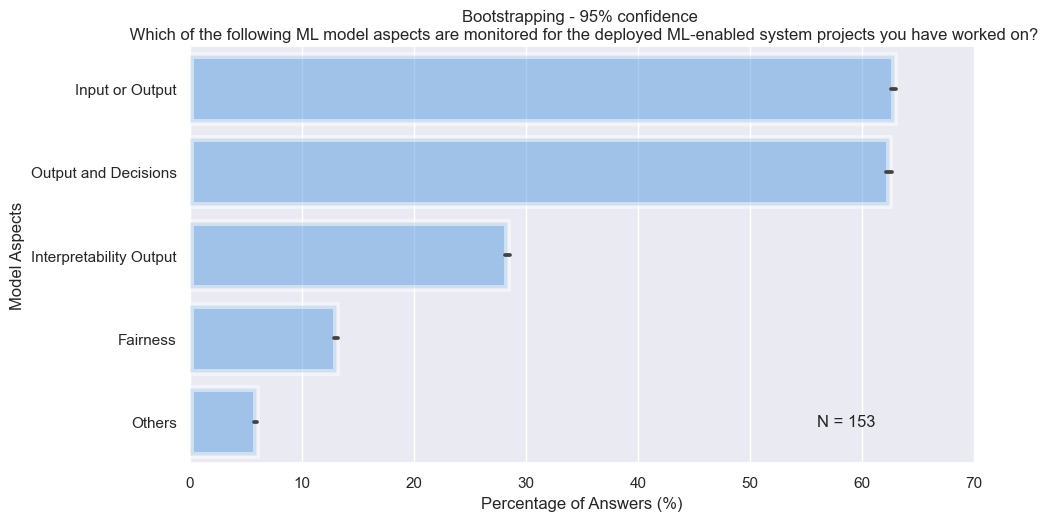

In [23]:
q16_boot_plot.single_barplot(x_axis="Value", y_axis="Model Aspects", 
                       title="Bootstrapping - 95% confidence \n Which of the following ML model aspects are monitored for the deployed ML-enabled system projects you have worked on?",
                       x_label="Percentage of Answers (%)", y_label="Model Aspects", x_label_rotation=0, color="#429bf5",
                       total_answers=total_answers)

In [24]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':' + str(bootstrapped_dict_data[idx]['confidence']))

Option: (Lower Value, Mean, Upper Value)
Input_And_Output:(0.6258227820395859, 0.6283202614379083, 0.6308177408362308)
Interpretability_Output:(0.28100018379573366, 0.28319607843137257, 0.2853919730670115)
Output_And_Decisions:(0.6216434088782303, 0.6240457516339868, 0.6264480943897432)
Fairness:(0.1287790362631233, 0.1304575163398693, 0.1321359964166153)
Others:(0.05758253656924534, 0.05875816993464052, 0.05993380330003569)


In [25]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':: P = ' + str(round((bootstrapped_dict_data[idx]['confidence'][1] * 100), 3)) + " [" + str(round((bootstrapped_dict_data[idx]['confidence'][0] * 100), 3)) + ", " + str(round((bootstrapped_dict_data[idx]['confidence'][2] * 100), 3)) + "]")

Option: (Lower Value, Mean, Upper Value)
Input_And_Output:: P = 62.832 [62.582, 63.082]
Interpretability_Output:: P = 28.32 [28.1, 28.539]
Output_And_Decisions:: P = 62.405 [62.164, 62.645]
Fairness:: P = 13.046 [12.878, 13.214]
Others:: P = 5.876 [5.758, 5.993]


In [26]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + '\t' + str(round((bootstrapped_dict_data[idx]['confidence'][1] * 100), 3)))

Option: (Lower Value, Mean, Upper Value)
Input_And_Output	62.832
Interpretability_Output	28.32
Output_And_Decisions	62.405
Fairness	13.046
Others	5.876
